# Self Organizing Maps

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('dataset_preprocessado.csv')
dataset = dataset.dropna()
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head(15)
# dataset.iloc[:, 1:-1]

,unknown_smoking_status,formerly smoked,never smoked,smokes,Govt_job,Never_worked,Private,Self-employed,children,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,0,1,0,0,0,0,1,0,0,9046,0,67.0,0,1,1,0,228.69,36.6,1
2,0,0,1,0,0,0,1,0,0,31112,0,80.0,0,1,1,1,105.92,32.5,1
3,0,0,0,1,0,0,1,0,0,60182,1,49.0,0,0,1,0,171.23,34.4,1
4,0,0,1,0,0,0,0,1,0,1665,1,79.0,1,0,1,1,174.12,24.0,1
5,0,1,0,0,0,0,1,0,0,56669,0,81.0,0,0,1,0,186.21,29.0,1
6,0,0,1,0,0,0,1,0,0,53882,0,74.0,1,1,1,1,70.09,27.4,1
7,0,0,1,0,0,0,1,0,0,10434,1,69.0,0,0,0,0,94.39,22.8,1
9,1,0,0,0,0,0,1,0,0,60491,1,78.0,0,0,1,0,58.57,24.2,1
10,0,0,1,0,0,0,1,0,0,12109,1,81.0,1,0,1,1,80.43,29.7,1
11,0,0,0,1,1,0,0,0,0,12095,1,61.0,0,1,1,1,120.46,36.8,1


In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X

array([[0.        , 1.        , 0.        , ..., 0.        , 0.80126489,
        0.30126002],
       [0.        , 0.        , 1.        , ..., 1.        , 0.23451205,
        0.25429553],
       [0.        , 0.        , 0.        , ..., 0.        , 0.53600776,
        0.27605956],
       ...,
       [0.        , 0.        , 1.        , ..., 1.        , 0.12865848,
        0.2325315 ],
       [0.        , 1.        , 0.        , ..., 1.        , 0.51320284,
        0.17525773],
       [1.        , 0.        , 0.        , ..., 0.        , 0.13922999,
        0.18213058]])

In [4]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 18, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

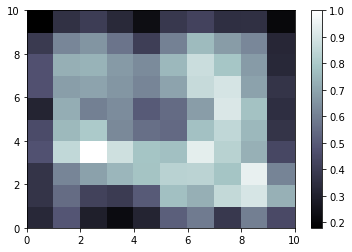

In [5]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
show()

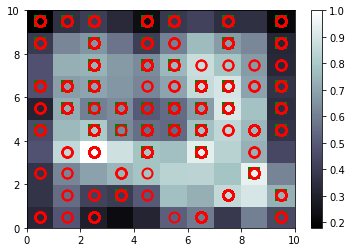

In [6]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors  = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()